# Group_9

# ASSIGNMENT 1

• Look at Continuous bag of word and GloVe method\
• Compare and contrast GloVe vs skip-gram\
• Extend the Wikipedia exercise\
• Implement a window based SVD model and visualize some example relationships\
• Compare the performance of SVD based embedding to word2vec

# I. Continuous bag of word et la methode   GloVe 

<a id="section-bow"></a>

#### <p style="font-family: Arial; font-size:1.4em;color:black;"> Bag of Words (BoW) </p>

bag of words est une représentation du texte qui décrit l'occurrence des mots dans un document. Elle implique deux éléments :

* Un vocabulaire de mots connus.
* Une mesure de la présence de mots connus.
On l'appelle un "*bag*" of words, car toute information sur l'ordre ou la structure des mots dans le document est écartée. Le modèle se préoccupe uniquement de savoir si des mots connus apparaissent dans le document, et non de savoir où ils se trouvent dans le document.

<a id="section-bow"></a>

#### <p style="font-family: Arial; font-size:1.4em;color:black;"> GloVe </p>

Le modèle GloVe apprend des vecteurs de mots en examinant les co-occurrences de mots dans un corpus de textes. Avant de former le modèle réel, pour se faire, nous devons construire une matrice de co-occurrence X, où une cellule Xij est une "force" qui représente la fréquence à laquelle le mot i apparaît dans le contexte du mot j. Nous parcourons notre corpus une seule fois pour construire la matrice X, et à partir de là, nous utilisons ces données de co-occurrence à la place du corpus réel. Nous construirons notre modèle en nous basant uniquement sur les valeurs recueillies dans X.

<a id="section-bow"></a>

#### <p style="font-family: Arial; font-size:1.4em;color:black;"> Skip-gram </p>

Le modèle Skip-gram  prend l'entrée comme chaque mot du corpus, les envoie à une couche cachée (couche d'intégration) et à partir de là, il prédit les mots de contexte. Une fois entraîné, l'intégration d'un mot particulier est obtenue en alimentant le mot en entrée et en prenant la valeur de couche cachée comme vecteur d'intégration final. 

Le GloVe et le Skip-gram sont des deux algorithmes les plus populaires pour les plongements de mots qui font ressortir la  similitude sémantique des mots qui capturent différentes facettes du sens d'un mot .

# II. Extension de l'exercice sur Wikipedia

 ## Collection des données

In [4]:
import bs4 as bs
import urllib
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt

# load the spaCy language model
sp = spacy.load('en_core_web_sm')

# link to the wikipedia of the president Senegal
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Macky_Sall')  
raw_html = raw_html.read()

wiki_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = wiki_html.find_all('p')
article_text = ''
for para in article_paragraphs:  
    article_text += para.text
   

In [5]:
print(article_text)


Macky Sall (born 11 December 1961[1]) is a Senegalese politician who has been President of Senegal since April 2012. He was re-elected President in the first round voting in February 2019 Senegalese presidential election. Under President Abdoulaye Wade, Sall was Prime Minister of Senegal from July 2004 to June 2007 and President of the National Assembly from June 2007 to November 2008.[2] He was the Mayor of Fatick from 2002 to 2008 and held that post again from 2009 to 2012.
Sall was a long-time member of the Senegalese Democratic Party (PDS). After coming into conflict with Wade, he was removed from his post as President of the National Assembly in November 2008; he consequently founded his own party named APR, and joined the opposition. Placing second in the first round of the 2012 presidential election, he won the backing of other opposition candidates and prevailed over Wade in the second round of voting, held on 25 March 2012.[3] He is the first president born after Senegalese i

# Traitement des données

### Suppression des caractères [1]..[46]

In [6]:
for i in range(1,46):
    article_text = article_text.replace(str([i]), "")
print(article_text)


Macky Sall (born 11 December 1961) is a Senegalese politician who has been President of Senegal since April 2012. He was re-elected President in the first round voting in February 2019 Senegalese presidential election. Under President Abdoulaye Wade, Sall was Prime Minister of Senegal from July 2004 to June 2007 and President of the National Assembly from June 2007 to November 2008. He was the Mayor of Fatick from 2002 to 2008 and held that post again from 2009 to 2012.
Sall was a long-time member of the Senegalese Democratic Party (PDS). After coming into conflict with Wade, he was removed from his post as President of the National Assembly in November 2008; he consequently founded his own party named APR, and joined the opposition. Placing second in the first round of the 2012 presidential election, he won the backing of other opposition candidates and prevailed over Wade in the second round of voting, held on 25 March 2012. He is the first president born after Senegalese independen

### Transformation du texte en miniscule

In [7]:
def lowercase(intext):
    return intext.lower()    

article_text_l = lowercase(article_text)

### Suppression des ponctuations

In [8]:
from string import punctuation
import string

punctuations = string.punctuation
print('list of punctuations:', punctuations)

def punctuation_cleaning(article):
    return article.translate(str.maketrans('', '', punctuations))

clean_corpus = punctuation_cleaning(article_text_l)
print(clean_corpus)

list of punctuations: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

macky sall born 11 december 1961 is a senegalese politician who has been president of senegal since april 2012 he was reelected president in the first round voting in february 2019 senegalese presidential election under president abdoulaye wade sall was prime minister of senegal from july 2004 to june 2007 and president of the national assembly from june 2007 to november 2008 he was the mayor of fatick from 2002 to 2008 and held that post again from 2009 to 2012
sall was a longtime member of the senegalese democratic party pds after coming into conflict with wade he was removed from his post as president of the national assembly in november 2008 he consequently founded his own party named apr and joined the opposition placing second in the first round of the 2012 presidential election he won the backing of other opposition candidates and prevailed over wade in the second round of voting held on 25 march 2012 he is the first presid

###  Tokenization 

In [9]:
from nltk import word_tokenize

tokens = word_tokenize(clean_corpus)
print(tokens)

['macky', 'sall', 'born', '11', 'december', '1961', 'is', 'a', 'senegalese', 'politician', 'who', 'has', 'been', 'president', 'of', 'senegal', 'since', 'april', '2012', 'he', 'was', 'reelected', 'president', 'in', 'the', 'first', 'round', 'voting', 'in', 'february', '2019', 'senegalese', 'presidential', 'election', 'under', 'president', 'abdoulaye', 'wade', 'sall', 'was', 'prime', 'minister', 'of', 'senegal', 'from', 'july', '2004', 'to', 'june', '2007', 'and', 'president', 'of', 'the', 'national', 'assembly', 'from', 'june', '2007', 'to', 'november', '2008', 'he', 'was', 'the', 'mayor', 'of', 'fatick', 'from', '2002', 'to', '2008', 'and', 'held', 'that', 'post', 'again', 'from', '2009', 'to', '2012', 'sall', 'was', 'a', 'longtime', 'member', 'of', 'the', 'senegalese', 'democratic', 'party', 'pds', 'after', 'coming', 'into', 'conflict', 'with', 'wade', 'he', 'was', 'removed', 'from', 'his', 'post', 'as', 'president', 'of', 'the', 'national', 'assembly', 'in', 'november', '2008', 'he', 

In [10]:
len(tokens)

2390

### Suppression des mots recurrents (stopwords)

In [11]:
from nltk.corpus import stopwords
import nltk

# recuperation des stopwords en anglais
sw = nltk.corpus.stopwords.words('english')

tokens_wsw = []              # initialisation d'une liste
for word in tokens:
    if word not in sw:
        tokens_wsw.append(word)
print(tokens_wsw)

['macky', 'sall', 'born', '11', 'december', '1961', 'senegalese', 'politician', 'president', 'senegal', 'since', 'april', '2012', 'reelected', 'president', 'first', 'round', 'voting', 'february', '2019', 'senegalese', 'presidential', 'election', 'president', 'abdoulaye', 'wade', 'sall', 'prime', 'minister', 'senegal', 'july', '2004', 'june', '2007', 'president', 'national', 'assembly', 'june', '2007', 'november', '2008', 'mayor', 'fatick', '2002', '2008', 'held', 'post', '2009', '2012', 'sall', 'longtime', 'member', 'senegalese', 'democratic', 'party', 'pds', 'coming', 'conflict', 'wade', 'removed', 'post', 'president', 'national', 'assembly', 'november', '2008', 'consequently', 'founded', 'party', 'named', 'apr', 'joined', 'opposition', 'placing', 'second', 'first', 'round', '2012', 'presidential', 'election', 'backing', 'opposition', 'candidates', 'prevailed', 'wade', 'second', 'round', 'voting', 'held', '25', 'march', '2012', 'first', 'president', 'born', 'senegalese', 'independence

In [12]:
len(tokens_wsw)

1411

### Normalisation (Lemmatization)

In [13]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmawords = [lemmatizer.lemmatize(word) for word in tokens_wsw]
print (lemmawords)

['macky', 'sall', 'born', '11', 'december', '1961', 'senegalese', 'politician', 'president', 'senegal', 'since', 'april', '2012', 'reelected', 'president', 'first', 'round', 'voting', 'february', '2019', 'senegalese', 'presidential', 'election', 'president', 'abdoulaye', 'wade', 'sall', 'prime', 'minister', 'senegal', 'july', '2004', 'june', '2007', 'president', 'national', 'assembly', 'june', '2007', 'november', '2008', 'mayor', 'fatick', '2002', '2008', 'held', 'post', '2009', '2012', 'sall', 'longtime', 'member', 'senegalese', 'democratic', 'party', 'pd', 'coming', 'conflict', 'wade', 'removed', 'post', 'president', 'national', 'assembly', 'november', '2008', 'consequently', 'founded', 'party', 'named', 'apr', 'joined', 'opposition', 'placing', 'second', 'first', 'round', '2012', 'presidential', 'election', 'backing', 'opposition', 'candidate', 'prevailed', 'wade', 'second', 'round', 'voting', 'held', '25', 'march', '2012', 'first', 'president', 'born', 'senegalese', 'independence',

### Observations de certains mots et leurs  nombre d'occurences

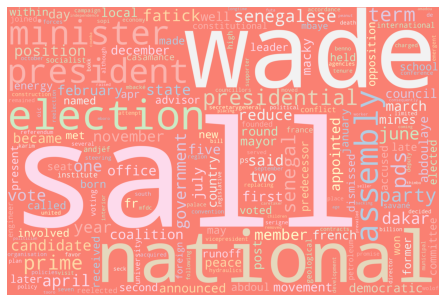

In [31]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',
                      collocations=False, stopwords = STOPWORDS).generate(clean_corpus)
# Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [14]:
from collections import Counter
Counter(lemmawords).most_common(50)

[('sall', 57),
 ('wade', 28),
 ('national', 25),
 ('election', 20),
 ('president', 19),
 ('minister', 19),
 ('assembly', 17),
 ('presidential', 13),
 ('2012', 12),
 ('2008', 12),
 ('pd', 12),
 ('prime', 11),
 ('term', 11),
 ('senegal', 10),
 ('party', 10),
 ('2007', 9),
 ('salls', 9),
 ('senegalese', 8),
 ('june', 8),
 ('april', 7),
 ('one', 7),
 ('dakar', 7),
 ('also', 7),
 ('government', 7),
 ('vote', 7),
 ('year', 7),
 ('november', 6),
 ('fatick', 6),
 ('member', 6),
 ('candidate', 6),
 ('state', 6),
 ('position', 6),
 ('said', 6),
 ('reduce', 6),
 ('two', 6),
 ('first', 5),
 ('february', 5),
 ('july', 5),
 ('2009', 5),
 ('march', 5),
 ('five', 5),
 ('became', 5),
 ('appointed', 5),
 ('coalition', 5),
 ('would', 5),
 ('country', 5),
 ('office', 5),
 ('macky', 4),
 ('december', 4),
 ('since', 4)]

### Obtention des mots distincts (vocabulaire)

In [15]:
vocab = set(lemmawords)
print(vocab)

{'diagne', 'bill', 'popular', 'jeanpierre', 'local', 'could', 'meant', 'promise', 'marabout', 'committed', 'restored', 'reported', 'well', 'alliance', '6', 'shortly', 'nicolas', 'college', '2000', 'support', 'many', '1', 'budget', 'submitted', 'second', 'little', 'government', '44', '2130', 'enspm', '2010', 'policy', 'real', 'reelection', 'brought', 'successful', 'increased', 'city', 'said', '45', '2012', 'district', 'accused', 'met', 'slogan', 'university', 'soumaré', 'party', '1983', 'establishment', 'voting', '348', 'christian', 'laundering', '63', 'publication', 'odds', '4', 'ethnic', 'regional', 'consecutive', 'vatican', 'steering', 'within', 'emergent', 'parliamentary', 'universal', 'dubbed', 'charged', 'clash', 'race', 'illegal', 'committee', 'received', '58', 'october', 'interior', 'seck', 'commitment', 'vicepresident', 'saliou', 'allowed', 'weaken', 'directorgeneral', 'encouragement', 'economic', 'occasion', 'refused', 'enmity', 'excess', 'landing', 'm23', 'petroleum', 'benno'

In [16]:
len(vocab)

746

### Reconnaissance d’entités nommées (NER)

>* En traitement automatique du langage, la reconnaissance d’entités nommées cherche à détecter les entités telles que des personnes, des entreprises ou des lieux dans un texte. Cela s’effectue très facilement avec SpaCy.



In [17]:
def return_NER(sentence):
    # Tokeniser la phrase
    doc = sp(sentence)
    # Retourner le texte et le label pour chaque entité
    return [(X.text, X.label_) for X in doc.ents]

return_NER(clean_corpus)

[('11', 'CARDINAL'),
 ('1961', 'DATE'),
 ('april 2012', 'DATE'),
 ('first', 'ORDINAL'),
 ('february 2019', 'DATE'),
 ('july 2004', 'DATE'),
 ('2007', 'DATE'),
 ('june 2007', 'DATE'),
 ('2002', 'DATE'),
 ('2009', 'DATE'),
 ('november 2008', 'DATE'),
 ('second', 'ORDINAL'),
 ('first', 'ORDINAL'),
 ('2012', 'DATE'),
 ('second', 'ORDINAL'),
 ('25 march 2012', 'DATE'),
 ('first', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('five', 'CARDINAL'),
 ('1983', 'DATE'),
 ('1988', 'DATE'),
 ('1992', 'DATE'),
 ('the late 1980s', 'DATE'),
 ('1998', 'DATE'),
 ('2000', 'DATE'),
 ('6 april 2000', 'DATE'),
 ('12', 'CARDINAL'),
 ('13 december 2000', 'MONEY'),
 ('5 july 2001', 'DATE'),
 ('12 may 2001', 'DATE'),
 ('6 november 2002', 'DATE'),
 ('1 june 2002', 'DATE'),
 ('27 august 2003', 'DATE'),
 ('21 april 2004', 'DATE'),
 ('25 april 2004', 'DATE'),
 ('first', 'ORDINAL'),
 ('10 april', 'DATE'),
 ('19 june 2007', 'DATE'),
 ('2007', 'DATE'),
 ('19 june', 'DATE'),
 ('one day later', 'DATE'),
 ('20 june 2007', 'DATE'),

# II.1. Implement a window based SVD model and visualize some example relationships

>* Avant d'appliquer le SVD , nous allons vectoriser les mots en utilisant une représentation basée sur les fréquences: Term Frequency Inverse Document Frequency (TFIDF)

###  Vectorisation en utilsant TfidfVectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD


tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(vocab)

In [19]:
feature_names = tfidf_vectorizer.get_feature_names()

count_matrix_df = pd.DataFrame(X.toarray(), columns=feature_names)
# count_matrix_df

### Apllication du SVD

<ipython-input-20-466b0228832e>:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(word, xy=(transformed[word_index, 0], transformed[word_index, 1]),textcoords='offset points',


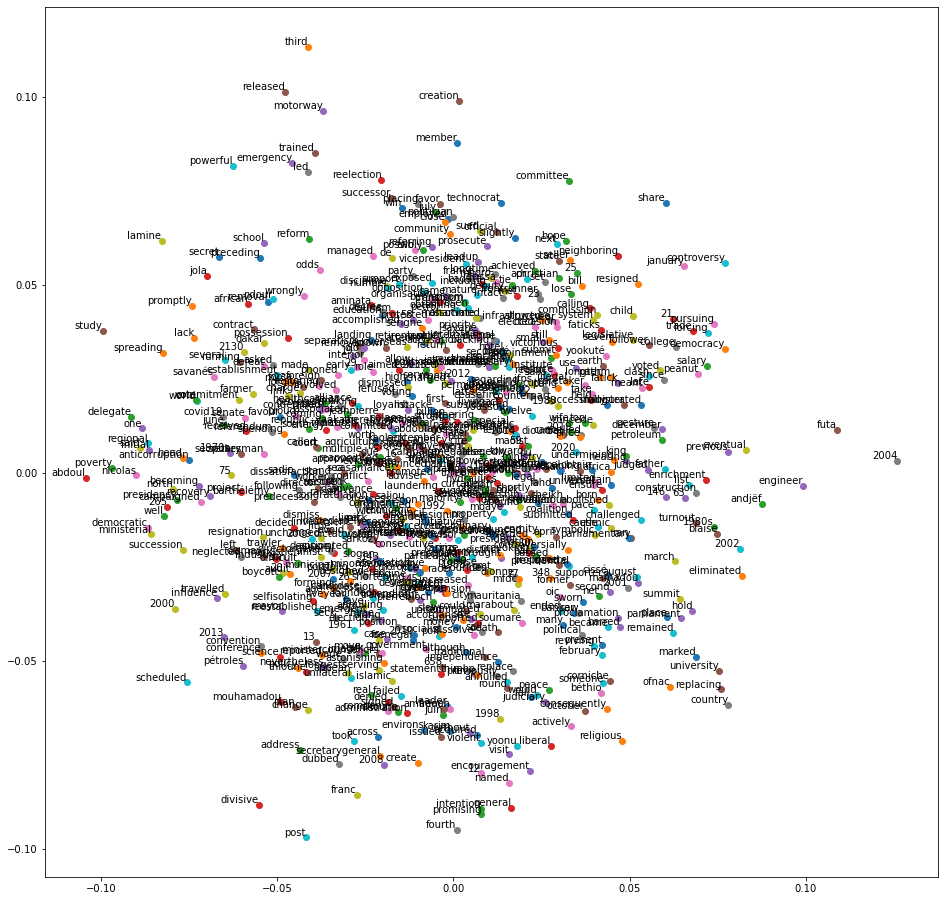

In [20]:
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=42)
plt.figure(figsize=(16,16))
transformed=svd_model.fit_transform(X)

for word_index, word in enumerate(vocab):
    plt.scatter(transformed[word_index, 0], transformed[word_index, 1])
    plt.annotate(word, xy=(transformed[word_index, 0], transformed[word_index, 1]),textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

>* Pour mieux apprécier la repartition des mots, nous allons faire une selection des mots dont les fréquences sont les plus élévées ceux-ci dans une liste et puis visualiser. 

In [21]:
liste=[ 'sall'            
 'wade',
 'national',
 'election',
 'president',
 'minister',
 'assembly',
'presidential',
'2012',
'2008',
'pd',
'prime',
'term',
'senegal',
'party']

<ipython-input-22-2a63c53e3d70>:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(word, xy=(transformed[word_index, 0], transformed[word_index, 1]),textcoords='offset points',


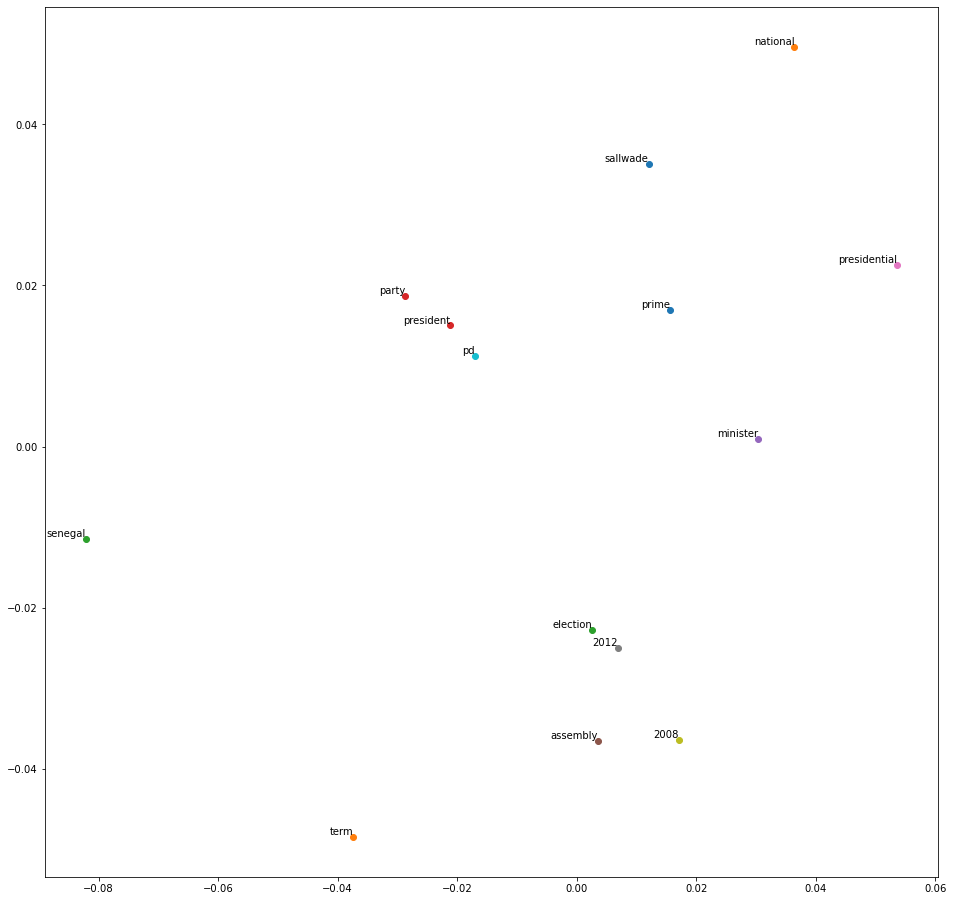

In [22]:
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=42)
plt.figure(figsize=(16,16))
transformed=svd_model.fit_transform(X)

for word_index, word in enumerate(liste):
    plt.scatter(transformed[word_index, 0], transformed[word_index, 1])
    plt.annotate(word, xy=(transformed[word_index, 0], transformed[word_index, 1]),textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

>* D'après la visualisation ci-dessus, on remarque les mots comme presidential, Sall, Wade, forment un cluster.

## II 2. Creating Word2Vec Model

In [23]:
from gensim.models import Word2Vec
import logging

/home/mathurin/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [24]:
# Entrainnement du modele
tokens = [word_tokenize(s) for s in clean_corpus.split('\n')]
model = Word2Vec(tokens, vector_size=5,window=5, min_count=5,epochs=5)
print(model)

Word2Vec(vocab=70, vector_size=5, alpha=0.025)


In [25]:
# Sauvegadons le modèle
model.save("word2vec.model")
model.save("model.bin")

In [26]:
vocabulary = list(model.wv.index_to_key)
print(vocabulary)

['the', 'of', 'in', 'to', 'and', 'sall', 'was', 'he', 'his', 'a', 'as', 'on', 'national', 'for', 'wade', 'with', 'from', 'president', 'assembly', 'minister', 'presidential', 'at', 'that', '2008', 'pds', 'election', '2012', 'by', 'prime', '2007', 'salls', 'which', 'party', 'term', 'june', 'senegalese', 'after', 'senegal', 'elections', 'also', 'government', 'april', 'an', 'were', 'one', 'had', 'dakar', 'been', 'november', 'fatick', 'who', 'two', 'this', 'position', 'reduce', 'said', 'wades', 'office', 'first', 'february', 'july', '2009', 'march', 'five', 'state', 'not', 'became', 'appointed', 'would', 'member']


In [27]:
# vecteur d'accès au vocabulaire
data = model.wv[vocabulary]
data

array([[ 0.10144185,  0.49186316,  0.39092442, -0.18734716, -0.07786491],
       [-0.03343571,  0.59360194,  0.45396355, -0.45840266,  0.03320628],
       [ 0.22546394,  0.31065205,  0.11106509, -0.1269915 , -0.01700708],
       [ 0.06313219,  0.4982862 ,  0.27864173, -0.5006781 , -0.08876582],
       [ 0.22997567,  0.4563479 ,  0.34554604, -0.25588855,  0.210828  ],
       [-0.00711684,  0.2528025 ,  0.27046177, -0.35651335, -0.01514338],
       [-0.1055432 ,  0.18780899,  0.3113326 , -0.30526423,  0.00188435],
       [ 0.04304753,  0.51742244,  0.0934122 , -0.2687771 , -0.00900096],
       [-0.13205579,  0.35933384, -0.02182492, -0.2837263 ,  0.06241815],
       [ 0.05993252,  0.13364346,  0.3612316 , -0.11960486,  0.25143287],
       [-0.09162147,  0.41264138,  0.10585409, -0.22532739,  0.23899865],
       [-0.02932675,  0.3524849 ,  0.01639582, -0.27156293,  0.25417   ],
       [ 0.01657324,  0.2198066 ,  0.04287551, -0.3140206 ,  0.01970029],
       [ 0.0948431 ,  0.17240605,  0.2

### Reduction dimension using SVD

<ipython-input-28-376e990178ea>:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(word, xy=(transformed[word_index, 0], transformed[word_index, 1]),textcoords='offset points',


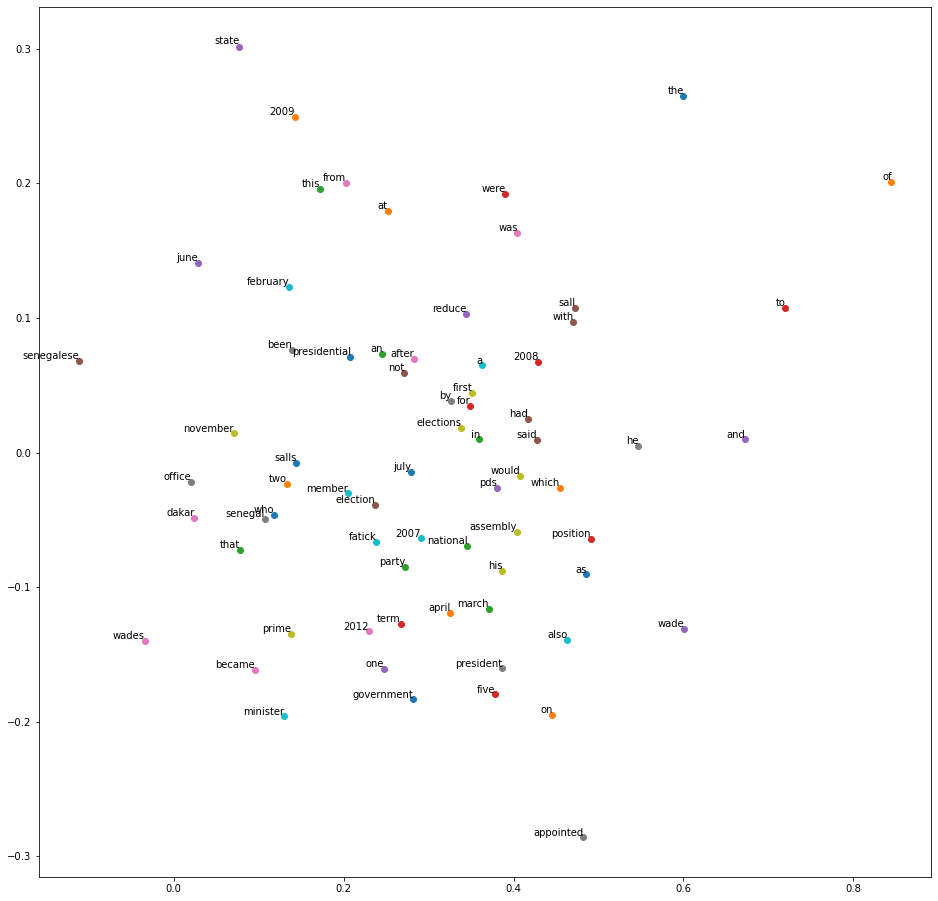

In [28]:
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=42)
transformed=svd_model.fit_transform(data)
plt.figure(figsize=(16,16))

for word_index, word in enumerate(vocabulary):
    plt.scatter(transformed[word_index, 0], transformed[word_index, 1])
    plt.annotate(word, xy=(transformed[word_index, 0], transformed[word_index, 1]),textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

 >* D'après la figure ci-dessus, on remarque les mots comme  assembly, national, 2007, Salls, member, election ,fatick, party,... forment un cluster. 

### Comparaison

>* En terme de comparaison, nous pouvons retenir que la méthode de Word2Vec est plus perfomante par rapport à la méthode de SVD car elle regroupe plus de mot ayant un même contexte.